# Data Transformation and it's effect in our Machine learning model.

This notebook is dedicated to provide insights regarding the Data transformation and it's effect on the accuracy of our machine learning models . This notebook is the continuation of the previous notebooks.

Part 1:- Descriptive Statistics related to our data can be found through this link. 

https://github.com/kscholar/Descriptive-Statistics-and-understanding-the-Data/blob/master/Pima_Indian_Diabetes%20(1).ipynb

Part 2:- Basic Data Visualisation to understand our data, can be found through this link.

https://github.com/kscholar/Basic-Data-Visualisation-and-understand-our-data/blob/master/Pima_Indian_Diabetes_Continued(PT_2).ipynb


Dataset used in this notebook can be found here. https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Data Preparation & Transformation **

Data preparation is a term that can be used synonymously used with terms like Data preprocessing, Exploratory Data Analysis. 

Many a times we have heard that we need to 'clean' the data to get good accuracy. However at times it can be unclear what exactly is a 'clean' data.

The real world data that we usually have is considered to be raw, unclean, and unfit for our Machine learning model.

When it comes to teaching machines to 'learn' we must know the language that machine know and understand. 

Hence we can say that the real world data or messy data or unclean data or raw data is the data understandable to human intelligence, and we need to convert it into a format that machines can understand. That's where the Data Preprocessing or Data preparation comes into play

Let's take a further look at how we can do Data preprocessing. In this notebook, we will focus on the conceptual aspects of Data Preparation, Data transformation and it's effect on the accuracy of our machine learning model, However those concepts may or may not be applicable considering the problem statement related to our Dataset. 

In [38]:
# importing files from local machine to colab
from google.colab import files
uploaded =  files.upload() 
# This code sometimes take twice to run properly

Saving diabetes.csv to diabetes (1).csv


In [0]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [0]:
Data = pd.read_csv('diabetes.csv')

In [41]:
# A quick recap of our Dataset
Data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Variables present in our Dataset 
1. Pregnancies Number of times pregnant.

2. GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. BloodPressure Diastolic blood pressure (mm Hg)
4. SkinThickness Triceps skin fold thickness (mm)
5. Insulin 2-Hour serum insulin (mu U/ml)
6. BMI Body mass index (weight in kg/(height in m)^2)
7. Diabetes Pedigree Function Diabetes pedigree function
8. Age Age of the patient (years)
9. Outcome Class variable or dependent variable (0 or 1) 268 of 768 are 1, the others are 0, Which means 268 out of the 768 had the diabetes and rest did not

In [42]:
# Analysing the missing values in our Data
Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We see that in all of our dataset there is no Missing value. It is important to have no missing values in our dataset as it may lead to lowered accuracies of our Machine learning Model.

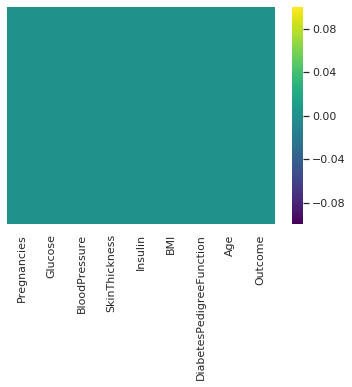

In [43]:
sns.heatmap(Data.isnull(),cmap='viridis',cbar=True,yticklabels=False)
plt.show()

Above Diagram is a heatmap visualisation depicting missing values from our Dataset. Since our dataset does not have any missing values so the heatmap does not shows any color variations. 

We will now look into further conceptual tools that we can use to transform our data as per the requirement. 

In [0]:
# We will make a copy of our data set and check what are the noticeable differences
Data_copy = Data.copy()

We will build a classifier to check noticeable differences in the accuracy when we manipulate our data.  

In [0]:
# Splitting the Dataset into training Data and test data
from sklearn.model_selection import train_test_split
predicted_columns = ['Outcome']
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = Data[feature_columns].values
Y = Data[predicted_columns].values
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33 , random_state=7  )

In [46]:
# creating the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#training our model on Training  dataset
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
result_raw=  model.score(X_test,Y_test)
result_raw

0.7559055118110236

We see that with the raw un processed data we get an accuracy of 0.7559 or 75.59 %.

We will now apply different preprocessing techniques like, Scaling, Normalizing, standardizing etc and we will see how heach of these techniques improve our accuracy.

# Scaling

There might be instances when our data might contain variable with different scales, In such cases we can scale our data. This is often referred as Normalisation and we adjust our data in the range on 0 to 1. 
This technique benefits Optimisation algorithms, It also useful for the algorithms that weight imputs like regression and Neural networks and the algorithms that use distance measures like, K-Nearest Neighbour. 

We scale our data with scikit-klearn Library  and MinMaxScaler class. 

In [0]:
Data_2 = Data_copy

In [0]:
predicted_column = ['Outcome']
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = Data_2[feature_columns].values
Y = Data_2[predicted_columns].values
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33 , random_state=7  )

In [0]:
# Using MinMaxScaler Class to scale our Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X_rescaled = scaler.fit_transform(X)
Y_rescaled = scaler.fit_transform(Y)

In [0]:
#Splitting the Rescaled Data into training and test set
X_rescaled_train, X_rescaled_test, Y_rescaled_train, Y_rescaled_test = train_test_split(X_rescaled,Y_rescaled, test_size = 0.33, random_state = 7 )

In [52]:
model.fit(X_rescaled_train,Y_rescaled_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
result_rescaled = model.score(X_rescaled_test,Y_rescaled_test)

In [54]:
#Comparing the results of unscaled and scaled data
result_raw , result_rescaled

(0.7559055118110236, 0.7677165354330708)

On comparing the accuracy of our model We see that our model gave us slightly greater accuracy when we scaled our data. 

We will now check how we can standardize,

#Standardization


Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

For standardizing our data we will use StandardScaler Class from  Scikit Learn Library

In [0]:
# Using StandardScaler Class to Standardise our Data
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_standardized = standardizer.fit_transform(X)

In [0]:
# We will now split our Standardized Data into training set and test set
X_standardized_train, X_standardized_test, Y_standardized_train, Y_standardized_test = train_test_split(X_standardized,Y, test_size = 0.33, random_state = 7)

In [57]:
#Using the logistic regression in the Standardized data
model.fit(X_standardized_train,Y_standardized_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
result_standardized = model.score(X_standardized_test,Y_standardized_test)

In [59]:
# Comparing the results of Raw data and Standardised data
result_raw, result_standardized

(0.7559055118110236, 0.7795275590551181)

In [0]:
# Binarizing our data
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0)
X_binarized = binarizer.fit_transform(X)
Y_binarized = binarizer.fit_transform(Y)
## Splitting our Binarized data into test set and trainig set
X_binarized_train, X_binarized_test, Y_binarized_train, Y_binarized_test = train_test_split(X_binarized,Y_binarized, test_size = 0.33, random_state = 7)

In [61]:
# Using our Logistic Regression in Binarized Data
model.fit(X_binarized_train,Y_binarized_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Obtaining the scores of our model while using the Binarized data
result_binarized = model.score(X_binarized_test,Y_binarized_test)

In [63]:
result_binarized

0.6259842519685039

In [64]:
results = pd.DataFrame([['Raw Data', result_1*100] ,['Rescaled Data', result_rescaled*100],['Standardized Data', result_standardized*100],['Binarized Data',result_binarized*100]])
results

,0,1
0,Raw Data,75.590551
1,Rescaled Data,76.771654
2,Standardized Data,77.952756
3,Binarized Data,62.598425


The above DataFrame shows us the differences in accuracies. This is a clear example  of how transforming our Data effects the accuracy. 

# Key Takeaways of this notebook

Data transformation is a process of changing or transforming our data in such a way that it's format gets changed as per the requirement. 

However This process must be subjective to the requirements of the problem statement and the machine learning algorithm that we are about to use. 

Want more free resources to learn?

Follow the link for Scikit learn Documentation.  https://scikit-learn.org/stable